(426, 640, 3)


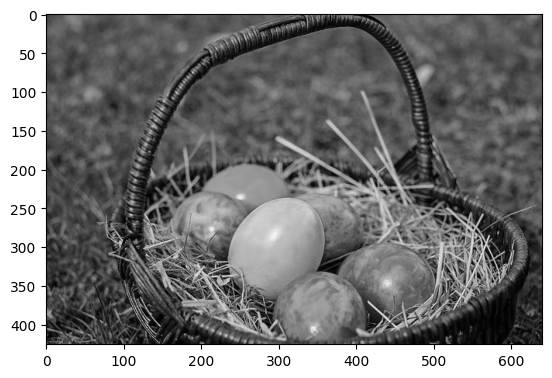

(426, 640)


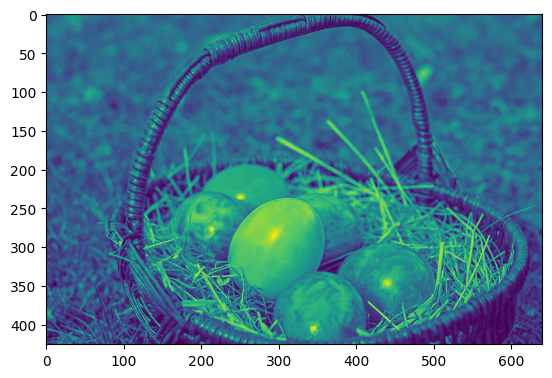

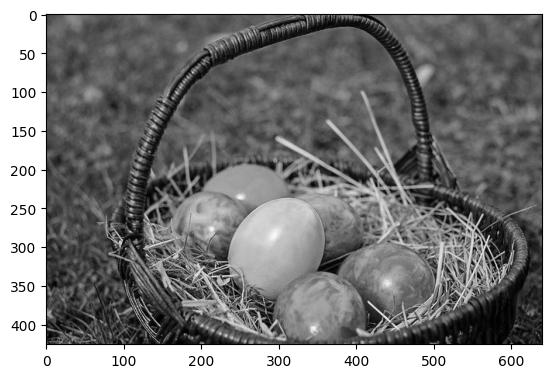

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

color_img = Image.open('fruits.jpg')
# plt.imshow(color_img)
# plt.show()

#이미지 객체 -> numpy 행렬
color_pixel = np.array(color_img)
print(color_pixel.shape)

gray_pixel = color_pixel.copy()

for y in range(gray_pixel.shape[0]):
    for x in range(gray_pixel.shape[1]):
        gray_pixel[y, x] = np.mean(gray_pixel[y, x])

plt.imshow(gray_pixel)
plt.show()

#흑백 이미지를 2차원 표현

gray_2d_pixel = gray_pixel[:, :, 0] # :은 행과 열 다 가져옴 2D로 바뀜
print(gray_2d_pixel.shape)

plt.imshow(gray_2d_pixel)
plt.show() #R값만 보여주고 나머지 다 0으로 들어감 

plt.imshow(gray_2d_pixel, 'gray')
plt.show()

(429, 640, 3)
(1, 429, 640, 3)
(1, 429, 640, 1)
(3, 3, 1, 1)
(1, 427, 638, 1)


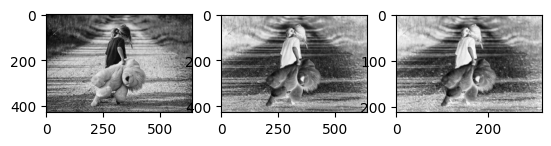

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure() # 큰 도화지
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ori_img = img.imread('images\girl.jpg')

ax1.imshow(ori_img)
print(ori_img.shape)

#convolution -> API
#API -> 4차원 (이미지 개수, 세로, 가로, 채널)
#(429, 640, 3) -> (1, 429, 640, 3) 4차원으로 바꿔주기 위해 1를 추가!
input_image = ori_img.reshape((1,) + ori_img.shape) #reshape은 3개를 4개로 만드는 역할
input_image = input_image.astype(np.float32) # 정수 값 -> tf에서 float 처리하기 위해
print(input_image.shape)

ch1_input_image = input_image[:,:,:,0:1] #차원을 줄이기 위해 슬라이싱 해줌 (데이터 간략화)
print(ch1_input_image.shape)
#(1, 429, 640, 1) 현재 상태

filter = np.array(
    [[[[-1]],[[0]],[[0]]],
    [[[0]],[[-1]],[[0]]],
    [[[0]],[[0]],[[-1]]]]
)

print(filter.shape)

conv2d = tf.nn.conv2d(
    ch1_input_image, 
    filter,
    strides = [1, 1, 1, 1], #이름 넣기 가능
    padding = 'VALID' #패딩을 고려X, 원래 값으로 
)

conv2d_result = conv2d.numpy()
print(conv2d_result.shape)

t_img = conv2d_result[0, :, :, :]
ax2.imshow(t_img, cmap = 'gray')

#pooling 공간 크기를 줄이거나 특정 정보를 강조하는 등의 목적
#Max Pooling은 각 풀링 영역에서 최대값을 추출하는 방식
pool = tf.nn.max_pool(
    conv2d_result,
ksize = [1, 3, 3, 1],
strides = [1, 2, 2, 1],
padding = 'VALID'
)
pool_result = pool.numpy()
t_img = pool_result[0, :, :, :]
ax3.imshow(t_img, cmap = 'gray')

In [26]:
#imageDataGenerator 텐서플로에 내장되어 있는 케라스

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib as plt

#위치
train_dir = 'cat_dog_small/train' #'리눅스에선 ./cat_dog_small/train'
validation_dir = 'cat_dog_small/validation'

#생성
train_datagen = ImageDataGenerator(rescale = 1/255) #0-1까지 정규화
validation_datagen = ImageDataGenerator(rescale = 1/255)

#설정
train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes = ['cats', 'dogs'], #타겟, 레이블 (순서 중요)
    target_size = (150, 150),
    batch_size = 30, 
    class_mode = 'binary'
)

#
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes = ['cats', 'dogs'], #타겟, 레이블 (순서 중요)
    target_size = (150, 150),
    batch_size = 30, 
    class_mode = 'binary'
)

Found 2004 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
